# Predicting Air Quality in Hetauda Using Machine Learning

Importing necessary Libraries

## Linear Regression

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1.Loading the Dataset

In [33]:
df = pd.read_csv('../data/processed/hetauda-cleaned.csv', index_col=0, parse_dates=True)

In [34]:
df.head()

,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity,pm25
date,,,,,,,
2022-04-01,29.4,20.0,5.2,956.2,19.8,73.0,64.0
2022-04-02,29.3,19.7,5.7,959.0,20.5,81.0,61.0
2022-04-03,28.6,21.3,4.5,956.5,19.1,72.0,54.0
2022-04-04,31.3,20.4,5.9,956.8,17.4,62.0,59.0
2022-04-05,32.9,20.7,6.4,959.0,16.4,55.0,59.0


### Seperating the columns for prediction in x and y variables
The dataset needs to be seperated in x and y before the PM25 prediction
* The six columns from [1 : 6] will be assigned as x.
* The date column will not be taken into consideration because of string value '-'.
* The last column which is PM25 will be assigned in y.

In [35]:
x = df.drop('pm25', axis=1)
y = df['pm25']

In [36]:
x.head()

,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity
date,,,,,,
2022-04-01,29.4,20.0,5.2,956.2,19.8,73.0
2022-04-02,29.3,19.7,5.7,959.0,20.5,81.0
2022-04-03,28.6,21.3,4.5,956.5,19.1,72.0
2022-04-04,31.3,20.4,5.9,956.8,17.4,62.0
2022-04-05,32.9,20.7,6.4,959.0,16.4,55.0


In [37]:
y.head()

date
2022-04-01    64.0
2022-04-02    61.0
2022-04-03    54.0
2022-04-04    59.0
2022-04-05    59.0
Name: pm25, dtype: float64

### Spiliting the dataset into training and testing
* The 80% of the dataset will be used for training the machine
* Whereas rest of the 20% will be used for testing purpose

For this we have to import library called train_test_spilit()

In [38]:
split = int(len(df) * 0.8)
x_train = x.iloc[:split]
x_test = x.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]

### Initializing Scaler
fitting and transforming it to the training data only while only transforming the test data to ensure model extract result from same format test data.

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Using linear regression for the prediction of the pm25 column
* First we will import LinearRegression model from sklearn library
* Then, we will fit x_train and y_train to predict the y column which is pm25 

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Predicting y by giving x_test as input
* Saving the value in y_pred so that we can compare the predicted value with y_test.
* This comparision will help find out the accuracy of the trained model.
* Finally, by the help of this we can calculate the error

In [42]:
y_pred = regressor.predict(x_test)
y_pred

array([ 27.08688498,  26.32697882,  32.44243199,  34.08853053,
        36.42294803,  33.66580602,  33.42568266,  27.06250592,
        35.43376917,  36.73386801,  34.50603226,  44.63042692,
        40.36171686,  26.71898147,  26.89301352,  33.30950405,
        34.30410819,  33.99900427,  33.37948275,  35.21669344,
        27.91025744,  36.11067416,  38.40075078,  40.58030088,
        41.69788249,  34.09994185,  29.00363634,  33.3554132 ,
        30.37043899,  33.17189751,  40.5880827 ,  39.53046967,
        40.64895422,  42.29388395,  54.24348857,  53.99686768,
        39.97805374,  33.00292651,  31.07744782,  24.41451462,
        27.64531353,  34.19869351,  34.60036939,  40.26845745,
        38.84343969,  37.6015574 ,  41.51450045,  47.09058074,
        53.63909398,  50.04308736,  45.96805256,  47.34087814,
        64.1259169 ,  63.12414756,  60.58870094,  69.30913585,
        74.56031411,  73.30468323,  71.27140536,  72.14004637,
        70.0609465 ,  69.40290871,  64.44260584,  70.23

### Making the DataFrame so that we can check both value side by side

In [43]:
df_pred = pd.DataFrame({'Predicted_Value': y_pred , 'Real_value': y_test})
df_pred

,Predicted_Value,Real_value
date,,
2023-08-26,27.086885,15.0
2023-08-27,26.326979,53.0
2023-08-28,32.442432,76.0
2023-08-29,34.088531,59.0
2023-08-30,36.422948,65.0
...,...,...
2023-12-27,78.348350,84.0
2023-12-28,79.477911,87.0
2023-12-29,82.303446,91.0


### Creating the Scatter Plot to compare Real vs Predicted Values

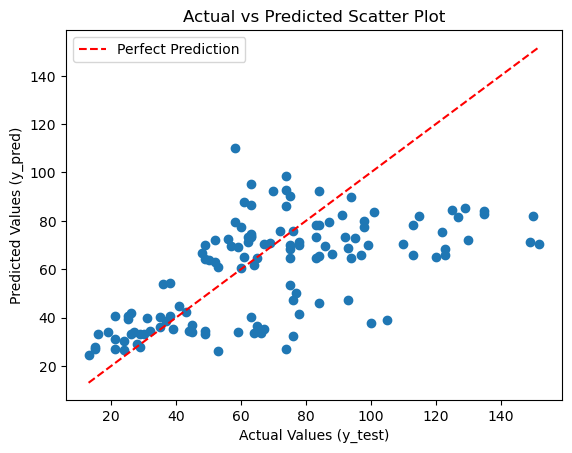

In [44]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.show()

### Calculating the Root Mean Squared Error, Mean Absolute Error and R2 Score
* We will give y_test and y_pred to evaluate the model

In [45]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

In [46]:
lr_results = pd.DataFrame(['Linear Regression', MAE , RMSE , R2]).transpose()
lr_results.columns = ['Method','MAE','RMSE' , 'R2']
lr_results

,Method,MAE,RMSE,R2
0,Linear Regression,20.78269,27.344103,0.288209


### Explaining the result of Linear Regression Model
The Linear Regression model acts as a basic benchmark to set a minimum performance threshold for this prediction task. The model produced a Mean Absolute Error (MAE) of 20.78 µg/m³, Root Mean Squared Error (RMSE) of 27.34 µg/m³ and an R-squared (R²) value of 0.288 for the test data.

An R² value of 0.29 indicates that the linear model can only explain approximately 29% of the variance in PM2.5 concentrations using the available meteorological data. This relatively low score suggests that the relationship between weather parameters and air pollution in Hetauda is not simple or linear. This result aligns with the insights from our Exploratory Data Analysis (EDA), which revealed skewed distributions and complex correlations that a linear model is not equipped to handle.

This baseline performance indicates that a more advanced, non-linear model is required to capture the complex dynamics of air quality in this region. Therefore, the next step is to develop and evaluate an Extreme Gradient Boosting (XGBoost) model, which is well-suited for modeling such non-linear relationships.

## XGBoost